## Análisis de Video y Extracción de Imágenes

Este notebook contiene el proceso y el código utilizado para:
1. Leer un video y extraer 30 imágenes.
2. Convertir las imágenes a escala de grises y redimensionarlas.
3. Colocar las imágenes en una matriz y restar el promedio.
4. Calcular valores y vectores propios.
5. Representar los vectores propios como imágenes.


In [1]:

import cv2
import numpy as np

# Leer el video
video_path = "./content/video1.mp4"
cap = cv2.VideoCapture(video_path)

# Obtener el número total de frames en el video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Determinar los índices de los frames que queremos extraer
frame_indices = np.linspace(0, total_frames-1, 30, dtype=int)

# Lista para guardar las imágenes extraídas
images = []

for i in range(total_frames):
    ret, frame = cap.read()
    if i in frame_indices:
        images.append(frame)

cap.release()
len(images), images[0].shape


(30, (720, 960, 3))

In [2]:

# Convertir las imágenes a escala de grises y cambiar su resolución
gray_resized_images = []

for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (600, 400))
    gray_resized_images.append(resized)

gray_resized_images[0].shape


(400, 600)

In [3]:

# Colocar las imágenes en una matriz H
H = np.zeros((400*600, 30))

for i, img in enumerate(gray_resized_images):
    H[:, i] = img.flatten()

H.shape


(240000, 30)

In [4]:

# Calcular el promedio de las filas y restarlo a cada fila de H
H_mean = np.mean(H, axis=1, keepdims=True)
A = H - H_mean

# Calcular la matriz de covarianza A^T * A
small_cov_matrix = np.dot(A.T, A)

# Obtener los valores propios y vectores propios de la matriz pequeña
small_eigenvalues, small_eigenvectors = np.linalg.eigh(small_cov_matrix)

# Ordenar los valores propios y vectores propios en orden descendente
sorted_indices_small = np.argsort(small_eigenvalues)[::-1]
small_eigenvalues = small_eigenvalues[sorted_indices_small]
small_eigenvectors = small_eigenvectors[:, sorted_indices_small]

# Los vectores propios de la matriz A * A^T se pueden obtener a partir de los vectores propios de A^T * A
largest_eigenvector_large_matrix = np.dot(A, small_eigenvectors[:, 0])
largest_eigenvector_large_matrix = largest_eigenvector_large_matrix / np.linalg.norm(largest_eigenvector_large_matrix)

smallest_eigenvector_large_matrix = np.dot(A, small_eigenvectors[:, -1])
smallest_eigenvector_large_matrix = smallest_eigenvector_large_matrix / np.linalg.norm(smallest_eigenvector_large_matrix)

small_eigenvalues[0], small_eigenvalues[-1]


(4700605810.729784, -1.7067791863951052e-07)

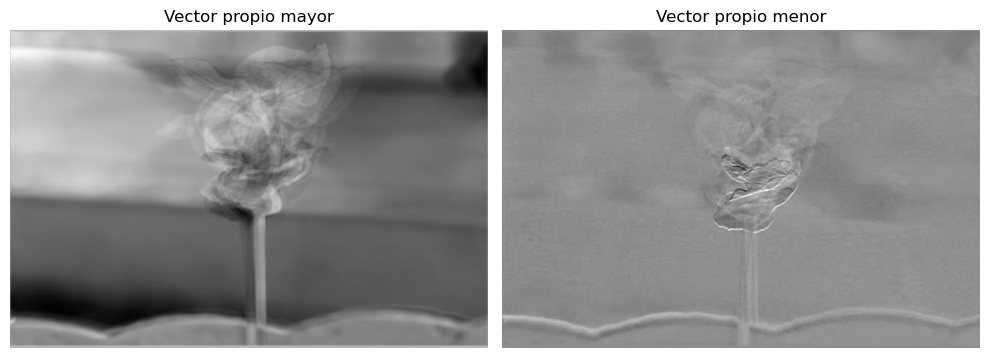

In [5]:

import matplotlib.pyplot as plt

# Convertir los vectores propios a imágenes
largest_eigenvector_img = largest_eigenvector_large_matrix.reshape(400, 600)
smallest_eigenvector_img = smallest_eigenvector_large_matrix.reshape(400, 600)

# Normalizar las imágenes para visualización
largest_eigenvector_img_normalized = cv2.normalize(largest_eigenvector_img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
smallest_eigenvector_img_normalized = cv2.normalize(smallest_eigenvector_img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Mostrar las imágenes
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(largest_eigenvector_img_normalized, cmap='gray')
ax[0].set_title('Vector propio mayor')
ax[0].axis('off')

ax[1].imshow(smallest_eigenvector_img_normalized, cmap='gray')
ax[1].set_title('Vector propio menor')
ax[1].axis('off')

plt.tight_layout()
plt.show()
